<a href="https://colab.research.google.com/github/robson-ribeiro-da-silva/projects_data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **ESTUDO DE CASO COM DATA SCIENCE**
# Detecção de Fraudes em Cartões de Crédito

<img alt="Logo" width="30%"  height="60" src="https://raw.githubusercontent.com/robson-ribeiro-da-silva/imagens/06b7c1b7ad2430cc21bd537aa63295410b1fddaa/banner_data_science_.jpg"> 

---

# **Fraudes em Cartões de Crédito**

A pandemia causada pelo Covid-19 no Brasil foi responsável pela mudança de muitos hábitos dos brasileiros, e um fator que sofreu grande impacto foi o comércio eletrônico, no qual a população aderiu ao costume de realizar compras pela internet. Segundo a Associação Brasileira de Comércio Eletrônico (ABCOMM), no ano de 2020 foi registrado um faturamento de R$ 126,3 bilhões em vendas on-line, o que representou um crescimento de 68%. Com isso, os cartões de créditos passaram a serem mais utilizados para a realização de pagamentos, representando grande parte das transações do varejo brasileiro, apesar do surgimento de novos meios de pagamento.  

Com esse cenário os criminosos estão desenvolvendo diversas técnicas de fraudes com cartões de crédito no e-commerce, tornando os golpes virtuais cada vez mais comuns e apresentando um crescimento bastante acelerado. De acordo com uma pesquisa realizada pela ACI Worldwide, os resultados permitiram conluir que 33% dos consumidores brasileiros foram vítimas de fraudes com cartões de crédito, débito e pré-pagos nos últimos cinco anos.


<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

A Inteligência Artificial tem se apresentado como alternativa mais viável para solucionar esse problema recorrente envolvendo fraudes com cartóes de crédito, pois o treinamento de algoritmos de machine learning com grandes volumes de dados é possível identificar transações fraudulentas que venham a ocorrer.

**Este projeto tem o objetivo de abordar o problema das fraudes em cartões de crédito e apresentar um algoritimo de machine learning como classificador de possíveis fraudes.**

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [ ]:
# ver as primeiras entradas

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("Tamanho de df: {}\n".format(df.shape))

Tamanho de df: (284807, 31)



In [ ]:
# exibir os tipos das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# exibir as colunas com valores nulos em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

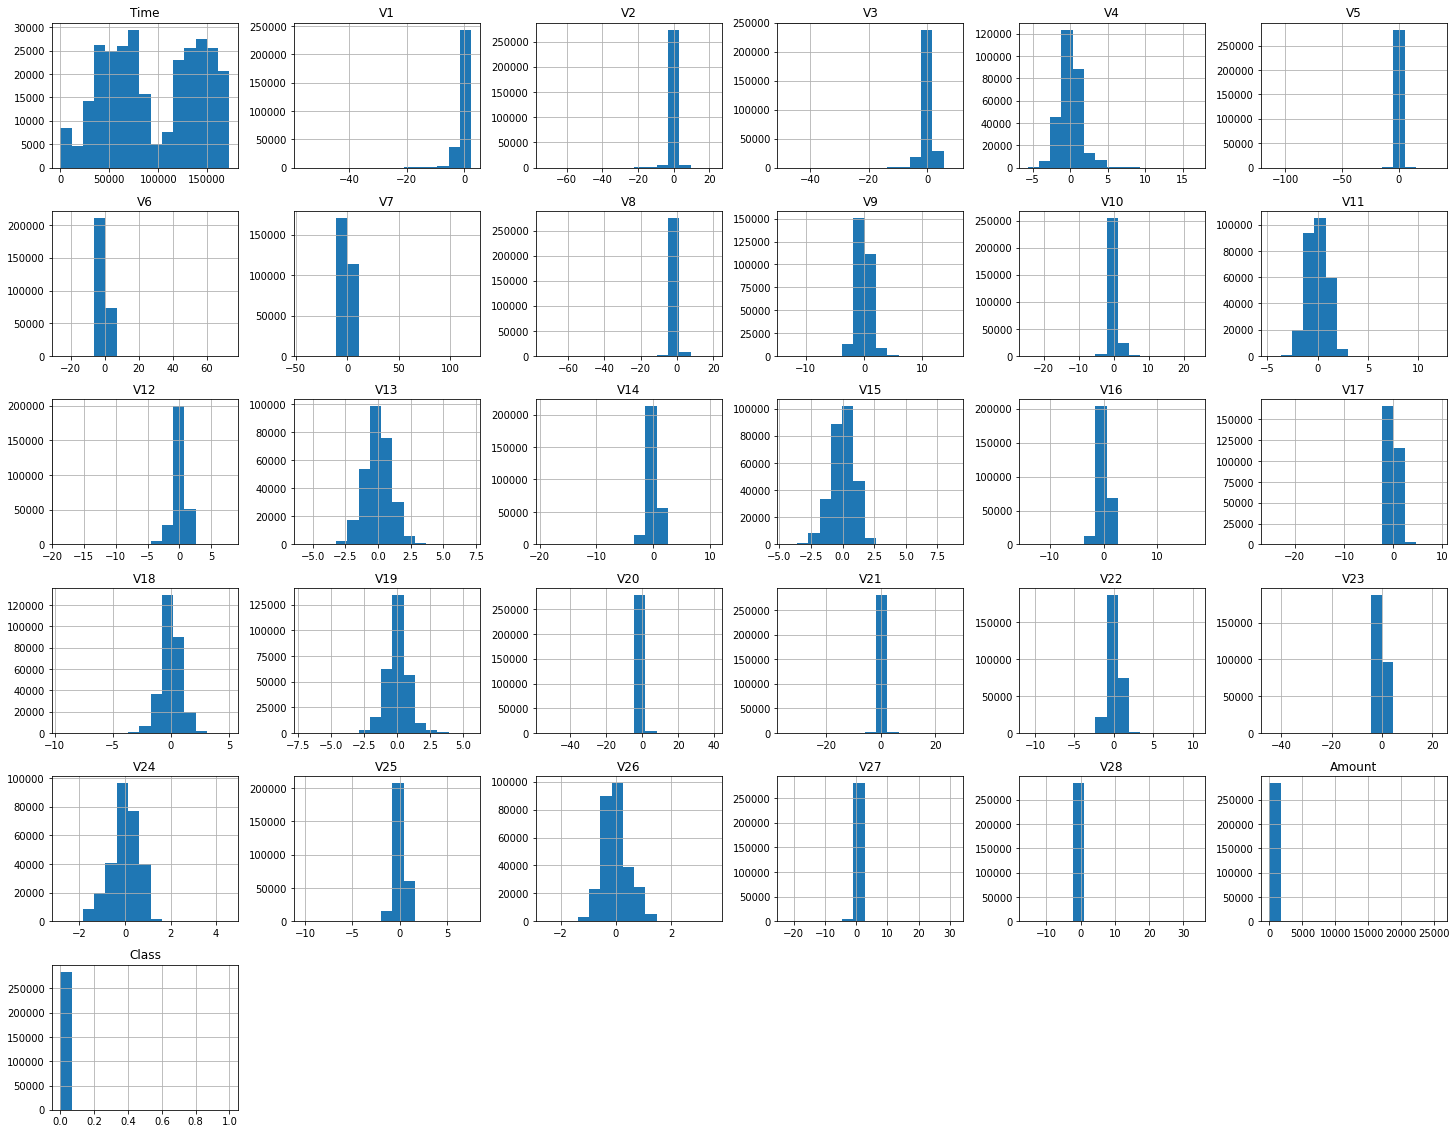

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(25,20));

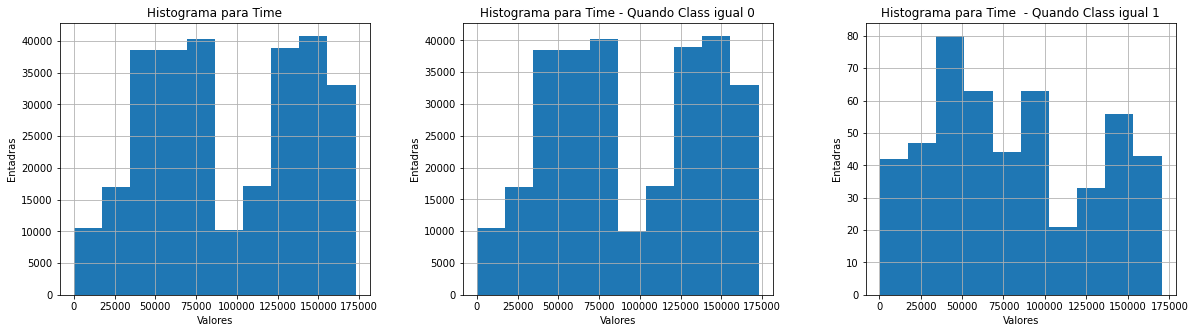

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# plotar o histograma para variavel Time
df['Time'].hist(ax=ax1);
ax1.set_title("Histograma para Time")
ax1.set_ylabel("Entadras")
ax1.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 0
df.loc[df.Class == 0, ['Time']].hist(ax=ax2);
ax2.set_title("Histograma para Time - Quando Class igual 0")
ax2.set_ylabel("Entadras")
ax2.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 1
df.loc[df.Class == 1, ['Time']].hist(ax=ax3);
ax3.set_title("Histograma para Time  - Quando Class igual 1")
ax3.set_ylabel("Entadras")
ax3.set_xlabel("Valores")

plt.show()

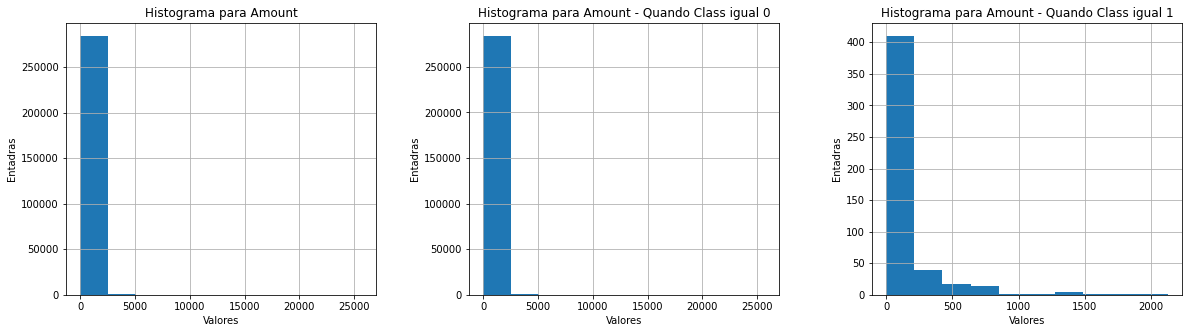

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# plotar o histograma para variavel Time
df['Amount'].hist(ax=ax1);
ax1.set_title("Histograma para Amount")
ax1.set_ylabel("Entadras")
ax1.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 0
df.loc[df.Class == 0, ['Amount']].hist(ax=ax2);
ax2.set_title("Histograma para Amount - Quando Class igual 0")
ax2.set_ylabel("Entadras")
ax2.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 1
df.loc[df.Class == 1, ['Amount']].hist(ax=ax3);
ax3.set_title("Histograma para Amount - Quando Class igual 1")
ax3.set_ylabel("Entadras")
ax3.set_xlabel("Valores")

plt.show()

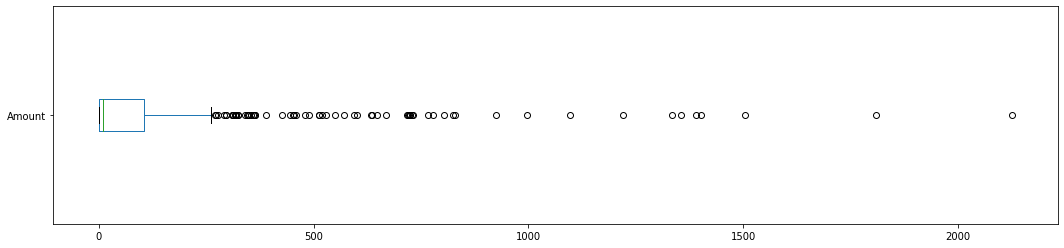

In [ ]:
# plotar o boxplot para variavel Amount
df.loc[df.Class == 1, ['Amount']].plot(kind='box', vert=False, figsize=(18, 4))

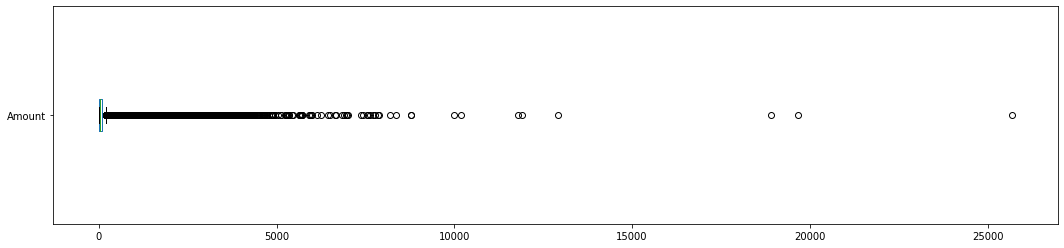

In [ ]:
# plotar o boxplot para variavel Amount
df.loc[df.Class == 0, ['Amount']].plot(kind='box', vert=False, figsize=(18, 4))

In [ ]:
# criar uma matriz de correlação
corr = df[['Time', 'Amount', 'Class']].corr()

display(corr)

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


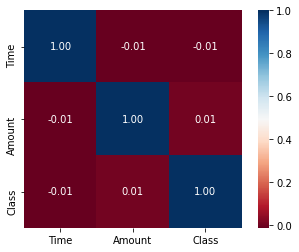

In [ ]:
# matriz de correlação
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* [*Recomendado*] Balancear o conjunto de dados

In [ ]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = df.drop('Class', axis=1)
y = df['Class']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)  # padronizar os dados de teste
y_pred = model.predict(X_test)

## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

In [ ]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71092
           1       0.84      0.70      0.76       110

    accuracy                           1.00     71202
   macro avg       0.92      0.85      0.88     71202
weighted avg       1.00      1.00      1.00     71202



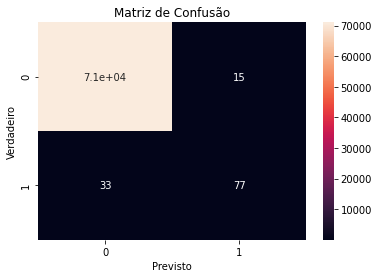

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão")
ax.set_ylabel("Verdadeiro")
ax.set_xlabel("Previsto")

plt.show()

In [ ]:
# probabilidades em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print("y_pred: \n", y_pred[0:15])
print("\ny_proba: \n", y_prob[0:15])

y_pred: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

y_proba: 
 [[9.99982504e-01 1.74958492e-05]
 [9.99827496e-01 1.72503851e-04]
 [9.99606245e-01 3.93754904e-04]
 [9.99879563e-01 1.20436611e-04]
 [9.99754586e-01 2.45414080e-04]
 [9.98965940e-01 1.03406029e-03]
 [9.99819696e-01 1.80304348e-04]
 [9.99696699e-01 3.03301286e-04]
 [9.98837245e-01 1.16275527e-03]
 [9.99366082e-01 6.33917622e-04]
 [9.98090222e-01 1.90977792e-03]
 [9.99702638e-01 2.97361903e-04]
 [9.99984917e-01 1.50830589e-05]
 [9.99743176e-01 2.56823604e-04]
 [9.99879771e-01 1.20229344e-04]]


## Conclusão

* Conclusões a respeito da construção do modelo